## Various types of Plots
In previous module we saw one of the basic types of plots -- line plots. Apart from line plots there are various different types of plots supported by matplotlib. 

In this module we shall take a look at some of them.

In this module, instead of plotting random data, we will load some of the publicly available datasets and plot them.

To load these files, we will be using `read_csv` function from `pandas` module.. somthing that we will dig deeper in the last module.

In [1]:
# Our boilerplate imports
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import numpy as np
import pandas as pd

In [2]:
global_co2_emission = pd.read_csv('sample_datasets/global_co2_emission.csv')

### Scatter plots
Scatter plots are similar to line plots except that instead of points being joined by line segments, in scatter plots, the points are represented by a shape like circle, triangle, dot etc. These shapes are known as markers

Lets take a look at a simple sine plot

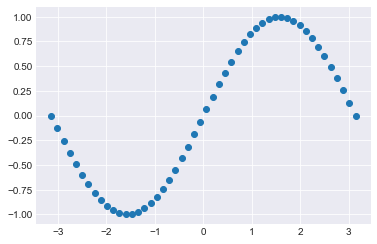

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111) 
theta = np.linspace(-np.pi, np.pi, 50)
plt.scatter(theta, np.sin(theta))

As you can see, in this plot the markers are the dots tracing the data points.

Generally you might use a scatter plot when there’s some kind of important (positive or negative) correlation between the data points, but you’ll learn ideal uses for the various types as you move forward in your career. 

#### Markers

There are various types of markers supported by matplotlib. Below is a visual representation of them

marker     |  description  ||marker    |  description  ||marker    |  description  ||marker    |  description  
:----------|:--------------||:---------|:--------------||:---------|:--------------||:---------|:--------------
"."        |  point        ||"+"       |  plus         ||","       |  pixel        ||"x"       |  cross
"o"        |  circle       ||"D"       |  diamond      ||"d"       |  thin_diamond ||          |
"8"        |  octagon      ||"s"       |  square       ||"p"       |  pentagon     ||"\*"      |  star
"&#124;"   |  vertical line||"\_"      | horizontal line ||"h"     |  hexagon1     ||"H"       |  hexagon2
0          |  tickleft     ||4         |  caretleft    ||"<"       | triangle_left ||"3"       |  tri_left
1          |  tickright    ||5         |  caretright   ||">"       | triangle_right||"4"       |  tri_right
2          |  tickup       ||6         |  caretup      ||"^"       | triangle_up   ||"2"       |  tri_up
3          |  tickdown     ||7         |  caretdown    ||"v"       | triangle_down ||"1"       |  tri_down
"None"     |  nothing      ||`None`    |  nothing      ||" "       |  nothing      ||""        |  nothing

<img src="images/mpl_markers.png" />
> Code to generate this plot is in `XX - Miscellaneous plots.ipynb` notebook

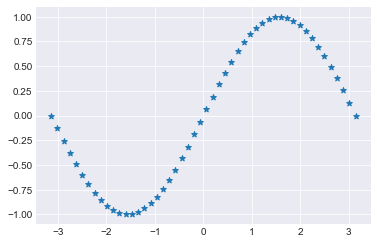

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111) 
theta = np.linspace(-np.pi, np.pi, 50)
plt.scatter(theta, np.sin(theta), marker="*")

The main difference between `plt.scatter` and `plt.plot` is that `plt.scatter` can be used to control the properties of each individual point (such as size, face color, edge color, etc.). Let's take a look at an example: 

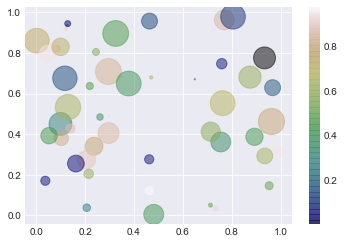

In [5]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii
fig = plt.figure()
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='gist_earth')
plt.colorbar()

The color argument is automatically mapped to a color scale which is shown using `plt.colorbar()`, and the `size` argument (area of the circles in our example) is given in pixels.

Colorbars are much like legends because they help to describe the data being displayed. While legends describe plots, i.e., `plot()`, `scatter()`, `hist()`, `stem()`, colorbars describe images.

In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

### Bar Plots

You’ve probably been dealing with and reading bar plots since your first days of school. Let’s dive into a simple example: 

<BarContainer object of 10 artists>

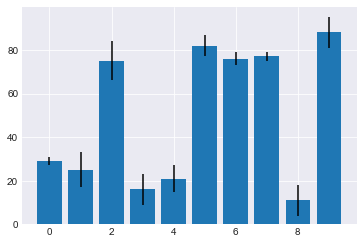

In [6]:
plt.bar(np.arange(10), np.random.randint(1, 100, 10), yerr=np.random.randint(2, 10, 10))

What you may not have done in school is work with the depiction of errors. For any scientific measurement, accurate accounting for errors is nearly as important, if not more important, than accurate reporting of the numbers themselves. In the visualization of data and results, showing these errors effectively can make a plot convey much more complete information. The yerr in above example represents the data for the error bar.

Just like scatter plot, we can play around with the properties of barplot changing things like width of the bars, colors, alignment of individual bars (either centered or at the edge), adding error bars, changing to log scale to name a few. You can also use barh to plot the above as horizontal bars like this:

<BarContainer object of 10 artists>

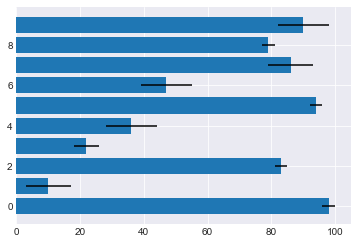

In [7]:
plt.barh(np.arange(10), np.random.randint(1, 100, 10), xerr=np.random.randint(2, 10, 10))

Now lets plot the global 𝐶𝑂2 emission.

Text(0.5, 1.0, 'Global $CO_2$ emissions')

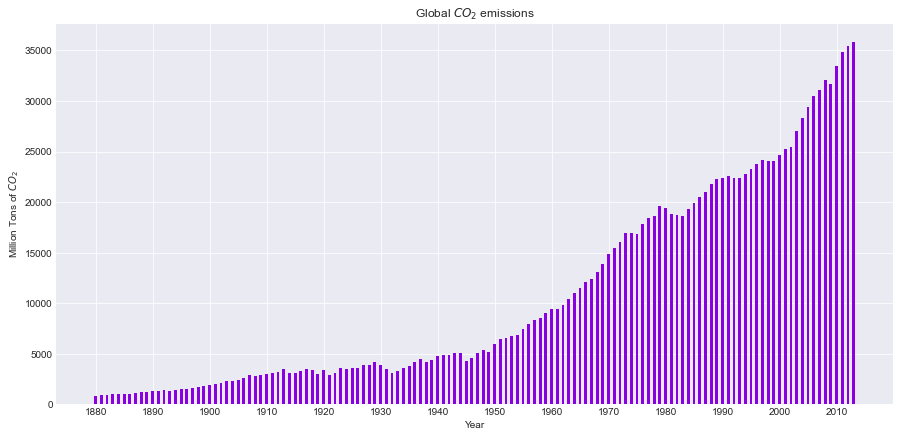

In [8]:
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(global_co2_emission['Year'], global_co2_emission['Total'], 
        width=0.5, align='center', color='#8900e1')
ax.set_xticks(global_co2_emission['Year'][::10]);
ax.set_xlabel('Year')
ax.set_ylabel('Million Tons of $CO_2$')
ax.set_title('Global $CO_2$ emissions')

In the above plot we changed the granularity of the ticks shown on the x-axis. For showing the year on the plot, we used set_xticks method passing it the numpy array containing year information and selecting 1 year every 10 years.

If you look at the above snippet closely, you’ll also notice that we have passed a new “color” argument to the “bar()” method which has changed the color of the bar plot (in this case, NYU purple!)

Next, let's take a look at different values that can be passed to color:  

#### color parameter
`color` parameter can be passed as strings. For very basic colors, you can even get away with just a single letter:

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

##### Hex values
Colors can also be specified by supplying a hex string, such as `'#0000FF'` for blue. You can check this website out for obtaining hex code for colors http://htmlcolorcodes.com/

##### 256 Shades of Gray
A gray level can be given instead of a color by passing a string representation of a number between 0 and 1, inclusive. `'0.0'` is black, while `'1.0'` is white. `'0.75'` would be a lighter shade of gray.

##### RGB[A] tuples
You may come upon instances where the previous ways of specifying colors do not work. This can sometimes happen in some of the deeper, stranger levels of the code. When all else fails, the universal language of colors for matplotlib is the RGB[A] tuple. This is the "Red", "Green", "Blue", and sometimes "Alpha" tuple of floats in the range of [0, 1]. One means full saturation of that channel, so a red RGBA tuple would be `(1.0, 0.0, 0.0, 1.0)`, whereas a partly transparent green RGBA tuple would be `(0.0, 1.0, 0.0, 0.75)`. 

> Note: oftentimes there is a separate argument for "alpha" whereever you can specify a color. The value for "alpha" will usually take precedence over the alpha value in the RGBA tuple. There is no easy way around this problem.

> To get all the colors and hex values, run the following code:
```python
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)
```

####  Hatches
A bar can have a hatching defined for it.

* /   - diagonal hatching
* \   - back diagonal
* |   - vertical
* \-   - horizontal
* \+   - crossed
* x   - crossed diagonal
* o   - small circle
* O   - large circle (upper-case 'o')
* .   - dots
* \*   - stars
     
The above letters can be combined, in which case all the specified
hatchings are done.  If same letter repeats, it increases the
density of hatching of that pattern.

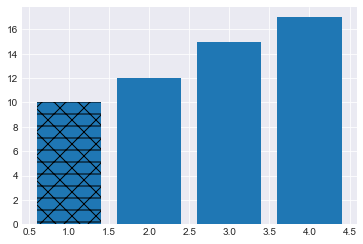

In [9]:
bars = plt.bar([1, 2, 3, 4], [10, 12, 15, 17])
# add hatches to the first bar
plt.setp(bars[0], hatch='x-',)
plt.show()

`plt.setp` is a method for setting a paroperty on any artist object(s). We won't be digging deep into the concept of Artists but think of them as simply plots that you create on the figure. 

So using `plt.setp` you can add more properties to an already created object (if it is supported by that plot type)

### Pie charts
You’ve been doing these since you were a child as well! Let’s take look at the construction of a sample pie chart plot: 

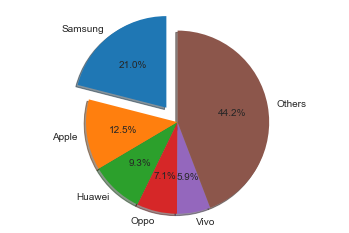

In [10]:
labels       = ['Samsung', 'Apple', 'Huawei', 'Oppo', 'Vivo', 'Others']
market_share = [21, 12.5, 9.3, 7.1, 5.9, 44.2]
explode      = [0.2, 0, 0, 0, 0, 0]
fig, ax      = plt.subplots()
ax.pie(market_share, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio so that we get a circle
ax.axis('equal');

### Histograms
A histogram is a graphical representation of the frequency of occurrence or distribution of the set of data. This plot gives you information like outliers, skewness, etc. of the dataset.

Let’s take a look at an example, using a series of random numbers from a normal distribution: 

Max:  3.5068941479696787
Min:  -3.3485346888104948


(array([  5.,  18.,  70., 188., 270., 229., 146.,  55.,  18.,   1.]),
 array([-3.34853469, -2.66299181, -1.97744892, -1.29190604, -0.60636315,
         0.07917973,  0.76472261,  1.4502655 ,  2.13580838,  2.82135126,
         3.50689415]),
 <BarContainer object of 10 artists>)

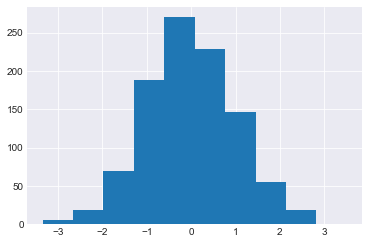

In [11]:
#Random numbers from normal distribution
data = np.random.randn(1000)
print("Max: ", data.max())
print("Min: ", data.min())
fig, ax = plt.subplots()
ax.hist(data)

The `x-axis` is the range of the values in data array and `y-axis` is the times that number has appeared in the array.

The `hist()` function has many parameters that can be fine tuned for visualizing distribution of the data, but for right now let’s just deal with just a few (they follow “bins” below): 

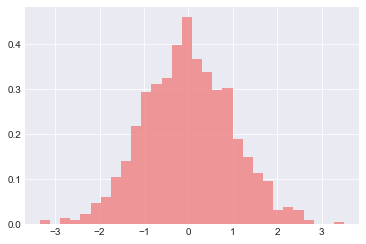

In [12]:
fig, ax = plt.subplots()
ax.hist(data, bins=30, density=True, alpha=0.8,
         histtype='barstacked', color='lightcoral',
         edgecolor='none');

You can also plot multiple histograms in a single figure as when, say, you want to separate channels of data in order to manipulate one or more of them. 

Let's say, for example, that you want to look at an image and plot the histogram of Red, Green and Blue pixels in order to affect one of the colors. 

For this example, we will import the scipy module to just load an RGB image of a raccoon

(-0.5, 1023.5, 767.5, -0.5)

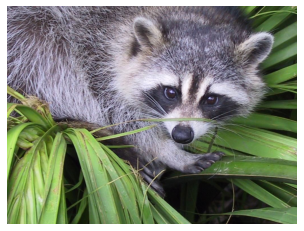

In [13]:
import scipy.misc
racoon  = scipy.misc.face()
fig, ax = plt.subplots()
ax.imshow(racoon)
# disable the grid lines and axis
ax.grid(False)
ax.axis('off')

Now let's look at the distribution for Red, Green and Blue (R,G,B) pixels

A NOTE ON WHY: The RGB color model is the model of colors used in display technologies like CRT (old monitors and TV), LCD (new TVs and probably your laptop or desktop monitor), OLED (on your fancy phones and smartwatches) and others. Each pixel is built by driving 3 very close but separated RGB light sources. The exact same happens with the cameras that use Bayer RGB filter: the light from the object is split into these RGB buckets depending on the wavelength of the incoming light. Without getting too technical, the takeaway is that every colored image can be separated into Red, Green and Blue channels.


In [14]:
# The image is a 3-D numpy array.. 3D = Red, Green, Blue
print('Type: ', type(racoon))
# An RGB image should have a shape of rows x cols x 3
print("Shape: ", racoon.shape)
# Lets check the dtype
print("Dtype: ", racoon.dtype)
# dype of uint8 means a range of 0 - 255

Type:  <class 'numpy.ndarray'>
Shape:  (768, 1024, 3)
Dtype:  uint8


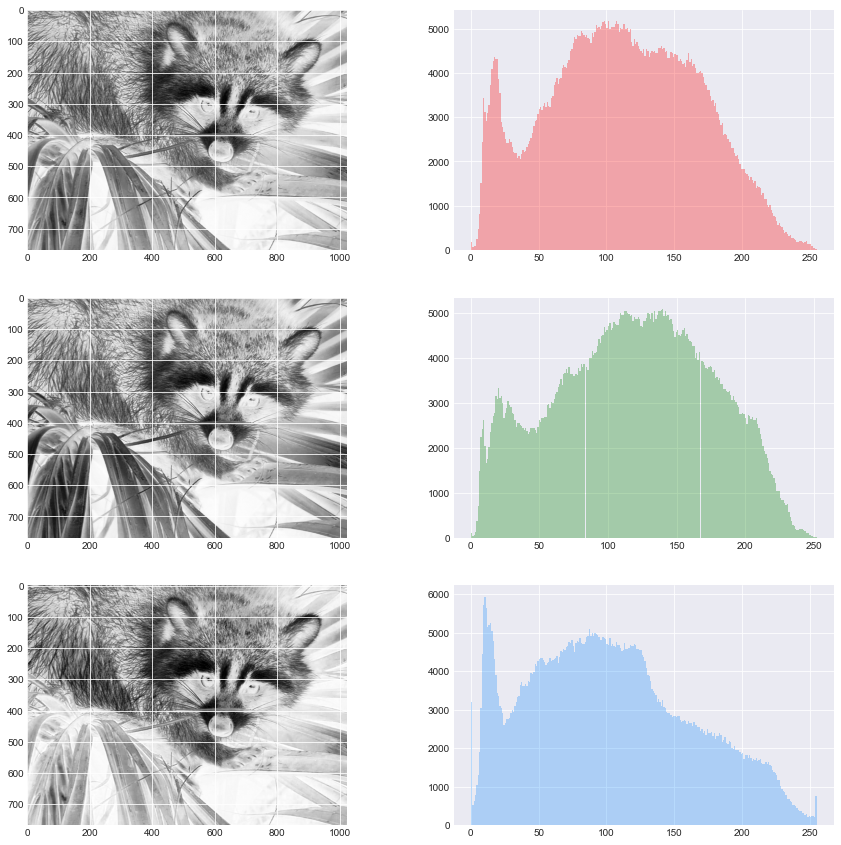

In [15]:
# Great, now lets plot the red, green and blue color channels
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
colors = ['red', 'green', 'dodgerblue']
for i in range(3):
    axes[i][0].imshow(racoon[:,:,i])
    axes[i][1].hist(racoon[:,:,i].ravel(), bins=255, alpha=0.3, color=colors[i])

The above plot shows the red, green and blue channel images on the left and histograms on the right.

We will take a look at subplots in the next module You could've also plot RGB channels together, in a single plot
```python
fig, ax = plt.subplots()
for i in range(3):
    ```
You can also use np.histogram if you would like to simply compute the histogram (that is, count the number of points in a given bin and not display it).

In [16]:
# For Red channel
counts, bins = np.histogram(racoon[:,:,0], bins=255)
print("Counts: ", counts)

Counts:  [ 172   59   73   91  248  464  807 1501 2435 3446 3108 2917 3107 3278
 3723 4095 4272 4353 4328 4329 3864 3540 2898 2776 2668 2504 2409 2407
 2511 2440 2317 2216 2190 2194 2085 2122 2062 2159 2252 2214 2229 2324
 2390 2451 2522 2632 2798 2910 2933 3075 3188 3224 3155 3255 3321 3239
 3344 3260 3239 3438 3473 3730 3809 3890 3753 3875 3885 4105 4172 4142
 4126 4239 4305 4509 4541 4683 4809 4781 4863 4849 4846 4961 4898 4851
 4809 4866 4784 4776 4677 4898 4819 4921 5079 5028 5051 4995 5073 5147
 5172 5103 5011 5169 5001 5054 5045 5034 5100 5169 5116 4936 5010 5001
 5107 5108 5008 5028 4932 4992 4699 4608 4766 4666 4707 4606 4537 4493
 4452 4541 4385 4541 4506 4370 4458 4499 4472 4504 4446 4458 4569 4559
 4622 4550 4565 4471 4494 4341 4351 4467 4444 4359 4435 4412 4400 4263
 4315 4275 4201 4228 4140 4306 4457 4240 4315 4152 4214 4104 3999 4003
 4026 4046 4012 3901 3765 3721 3623 3622 3474 3360 3396 3250 3331 3123
 3074 2948 2818 2863 2588 2612 2594 2516 2435 2436 2309 2308 2188 21